In [1]:
import pathlib
import textwrap

import google.generativeai as genai

import os

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [2]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
response = model.generate_content("What is football?")

CPU times: user 222 ms, sys: 36.6 ms, total: 259 ms
Wall time: 14.7 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> Football is a team sport played with a spherical ball between two teams of 11 players. It is played by passing, running, and kicking the ball into the opposing team's goal. The objective of the game is to score more goals than the other team by kicking the ball into the goal. Football is the most popular sport in the world, with an estimated 3.5 billion fans.
> 
> The game is played on a rectangular field called a pitch. The pitch is divided into two halves by a halfway line. Each half is further divided into three sections: the attacking third, the midfield third, and the defensive third. The goal is located at each end of the pitch. Players use their feet, head, and chest to control and pass the ball. They can also score goals by kicking the ball into the goal.
> 
> Football is a very physical sport. Players often tackle each other to try to win the ball. The game is also very fast-paced, with the ball often moving from one end of the pitch to the other in a matter of seconds.
> 
> Football is played by people of all ages and abilities. There are leagues for professional players, amateur players, and youth players. The World Cup is the most prestigious football tournament in the world. It is held every four years and brings together the best national teams in the world.
> 
> Here are some of the basic rules of football:
> 
> * The game is played on a rectangular field called a pitch.
> * The pitch is divided into two halves by a halfway line.
> * Each half is further divided into three sections: the attacking third, the midfield third, and the defensive third.
> * The goal is located at each end of the pitch.
> * A team consists of 11 players, including one goalkeeper.
> * The goalkeeper is the only player who is allowed to use their hands to handle the ball.
> * Players use their feet, head, and chest to control and pass the ball.
> * They can also score goals by kicking the ball into the goal.
> * The team that scores the most goals wins the game.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to saftey concerns regarding the prompt.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [ ]:
response.candidates

[content {
  parts {
    text: "Football is a team sport played with a spherical ball between two teams of 11 players. It is played by passing, running, and kicking the ball into the opposing team\'s goal. The objective of the game is to score more goals than the other team by kicking the ball into the goal. Football is the most popular sport in the world, with an estimated 3.5 billion fans.\n\nThe game is played on a rectangular field called a pitch. The pitch is divided into two halves by a halfway line. Each half is further divided into three sections: the attacking third, the midfield third, and the defensive third. The goal is located at each end of the pitch. Players use their feet, head, and chest to control and pass the ball. They can also score goals by kicking the ball into the goal.\n\nFootball is a very physical sport. Players often tackle each other to try to win the ball. The game is also very fast-paced, with the ball often moving from one end of the pitch to the other i

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use `GenerativeModel.generate_content(..., stream=True)`.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 102 ms, sys: 25.1 ms, total: 128 ms
Wall time: 7.94 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

Football is a team sport played with a spherical ball between two teams of 11 players. It is played by passing, running, and kicking the ball into the opposing team's goal. The objective of the game is to score more goals than the other team by kicking the ball into the goal. Football is the most popular sport in the world, with an estimated 3.5 billion fans.

The game is played on a rectangular field called a pitch. The pitch is divided into two halves by a halfway line. Each half is further divided into three sections: the attacking third, the midfield third, and the defensive third. The goal is located at each end of the pitch. Players use their feet, head, and chest to control and pass the ball. They can also score goals by kicking the ball into the goal.

Football is a very physical sport. Players often tackle each other to try to win the ball. The game is also very fast-paced, with the ball often moving from one end of the pitch to the other in a matter of seconds.

Football is p

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like `text` do not:

In [ ]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


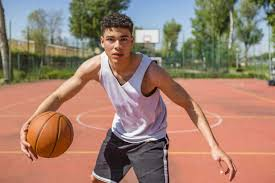

In [9]:
import PIL.Image

img = PIL.Image.open('./image.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [5]:
model = genai.GenerativeModel('gemini-pro-vision')

In [10]:
response = model.generate_content(img)

to_markdown(response.text)

>  The basketball player dribbles the ball down the court. He is wearing a white tank top and black shorts. He is looking ahead at the basket.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [11]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the sport and the rules.", img], stream=True)
response.resolve()

In [12]:
to_markdown(response.text)

>  Basketball is a popular sport that is played all over the world. It is a team sport in which two teams of five players each try to score points by throwing a ball through a hoop. The team with the most points at the end of the game wins.
> 
> The game is played on a rectangular court with a hoop at each end. The court is divided into two halves, and each team plays defense in one half and offense in the other. The game starts with a jump ball, and the team that wins the jump ball gets the first possession of the ball.
> 
> Each team has five players on the court at a time. The players are called guards, forwards, and centers. Guards are responsible for handling the ball and scoring points. Forwards are responsible for rebounding and scoring points. Centers are responsible for blocking shots and protecting the rim.
> 
> The game is played in four quarters, each lasting 12 minutes. The team with the most points at the end of the game wins. If the game is tied at the end of regulation, the game goes into overtime. Overtime is played in two 5-minute periods. The first team to score in overtime wins the game.
> 
> Basketball is a fast-paced and exciting game. It is a great way to get exercise and have fun. If you have never played basketball before, I encourage you to give it a try. You might just find that you love it.